In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df  = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
df = df.drop_duplicates()

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("*" * 75)


id
[ 9046 51676 31112 ... 19723 37544 44679]
***************************************************************************
gender
['Male' 'Female' 'Other']
***************************************************************************
age
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01

In [8]:
#Dropping unnecessary columns
df = df.drop(['id'], axis=1)

In [9]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
from sklearn.model_selection import train_test_split


# Splitting predictors (X) and response variable (y)
X = df.drop(columns=['stroke']) 
y = df['stroke']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


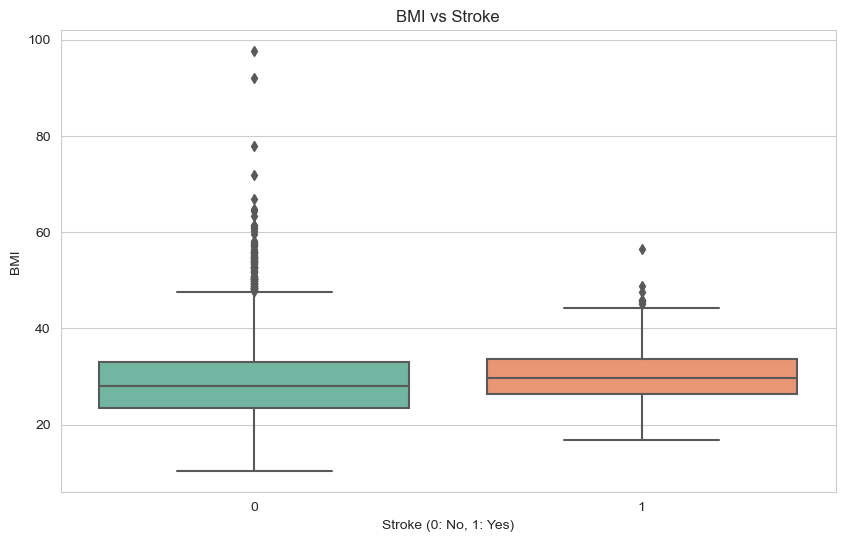

In [11]:
# Set the style of the visualization
sns.set_style("whitegrid")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='bmi', data=df, palette='Set2')
plt.title('BMI vs Stroke')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('BMI')
plt.show()

In [12]:
#Since BMI has outliers, performing median outlier imputation 
X_train['bmi'] = X_train['bmi'].fillna( X_train['bmi'].median()) 
X_test['bmi'] = X_test['bmi'].fillna( X_test['bmi'].median())

In [13]:
#Concatenate X_train and y_train into a single DataFrame
train_df = pd.concat([X_train, y_train], axis=1)

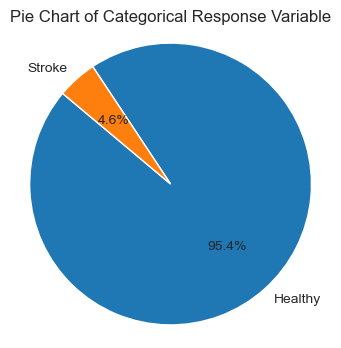

In [14]:
#Distribution of Response
# Calculate the frequency of each category in the response variable
response_counts = train_df['stroke'].value_counts()

# Replace 0 with 'Healthy' and 1 with 'Stroke'
response_labels = ['Healthy' if label == 0 else 'Stroke' for label in response_counts.index]

# Plot the pie chart with modified labels
plt.figure(figsize=(4, 4))
plt.pie(response_counts, labels=response_labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Categorical Response Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


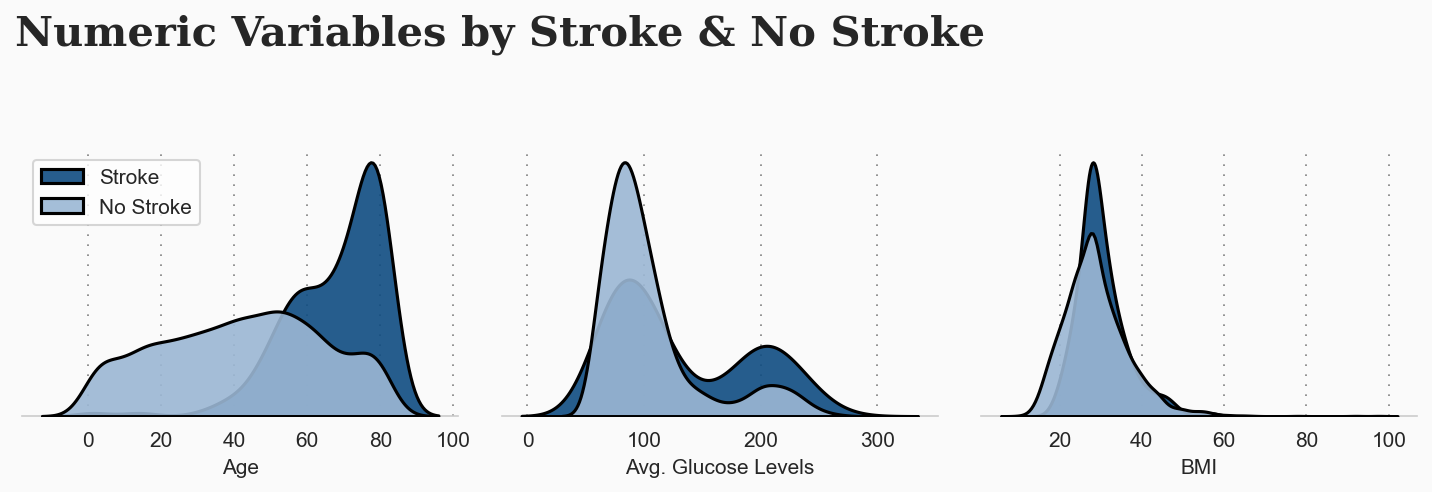

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = [variable for variable in train_df.columns if variable not in ['id','stroke']]

conts = ['age','avg_glucose_level','bmi']

background_color = "#fafafa"
fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = train_df[train_df['stroke'] == 1]
ns = train_df[train_df['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#0f4c81', fill=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#9bb7d4', fill=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        plot += 1

# Set labels for subplots
ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')

# Add legend
ax0.legend(['Stroke', 'No Stroke'], loc='upper left')

# Add title
ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')

plt.show()


In [16]:
from scipy.stats import kruskal

# Numerical predictors
num_predictors = ['age', 'avg_glucose_level', 'bmi']

# Dictionary to store p-values
p_values = {}

# Loop through each numerical predictor
for predictor in num_predictors:
    # Perform Kruskal-Wallis test
    stat, p_value = kruskal(*[group[predictor] for name, group in train_df.groupby('stroke')])
    
    # Store p-value in the dictionary
    p_values[predictor] = p_value

# Print p-values
for predictor, p_value in p_values.items():
    print(f'Kruskal-Wallis test p-value for {predictor}: {p_value}')


Kruskal-Wallis test p-value for age: 1.8399917920039157e-53
Kruskal-Wallis test p-value for avg_glucose_level: 3.401463216856164e-08
Kruskal-Wallis test p-value for bmi: 0.0011299901120693807


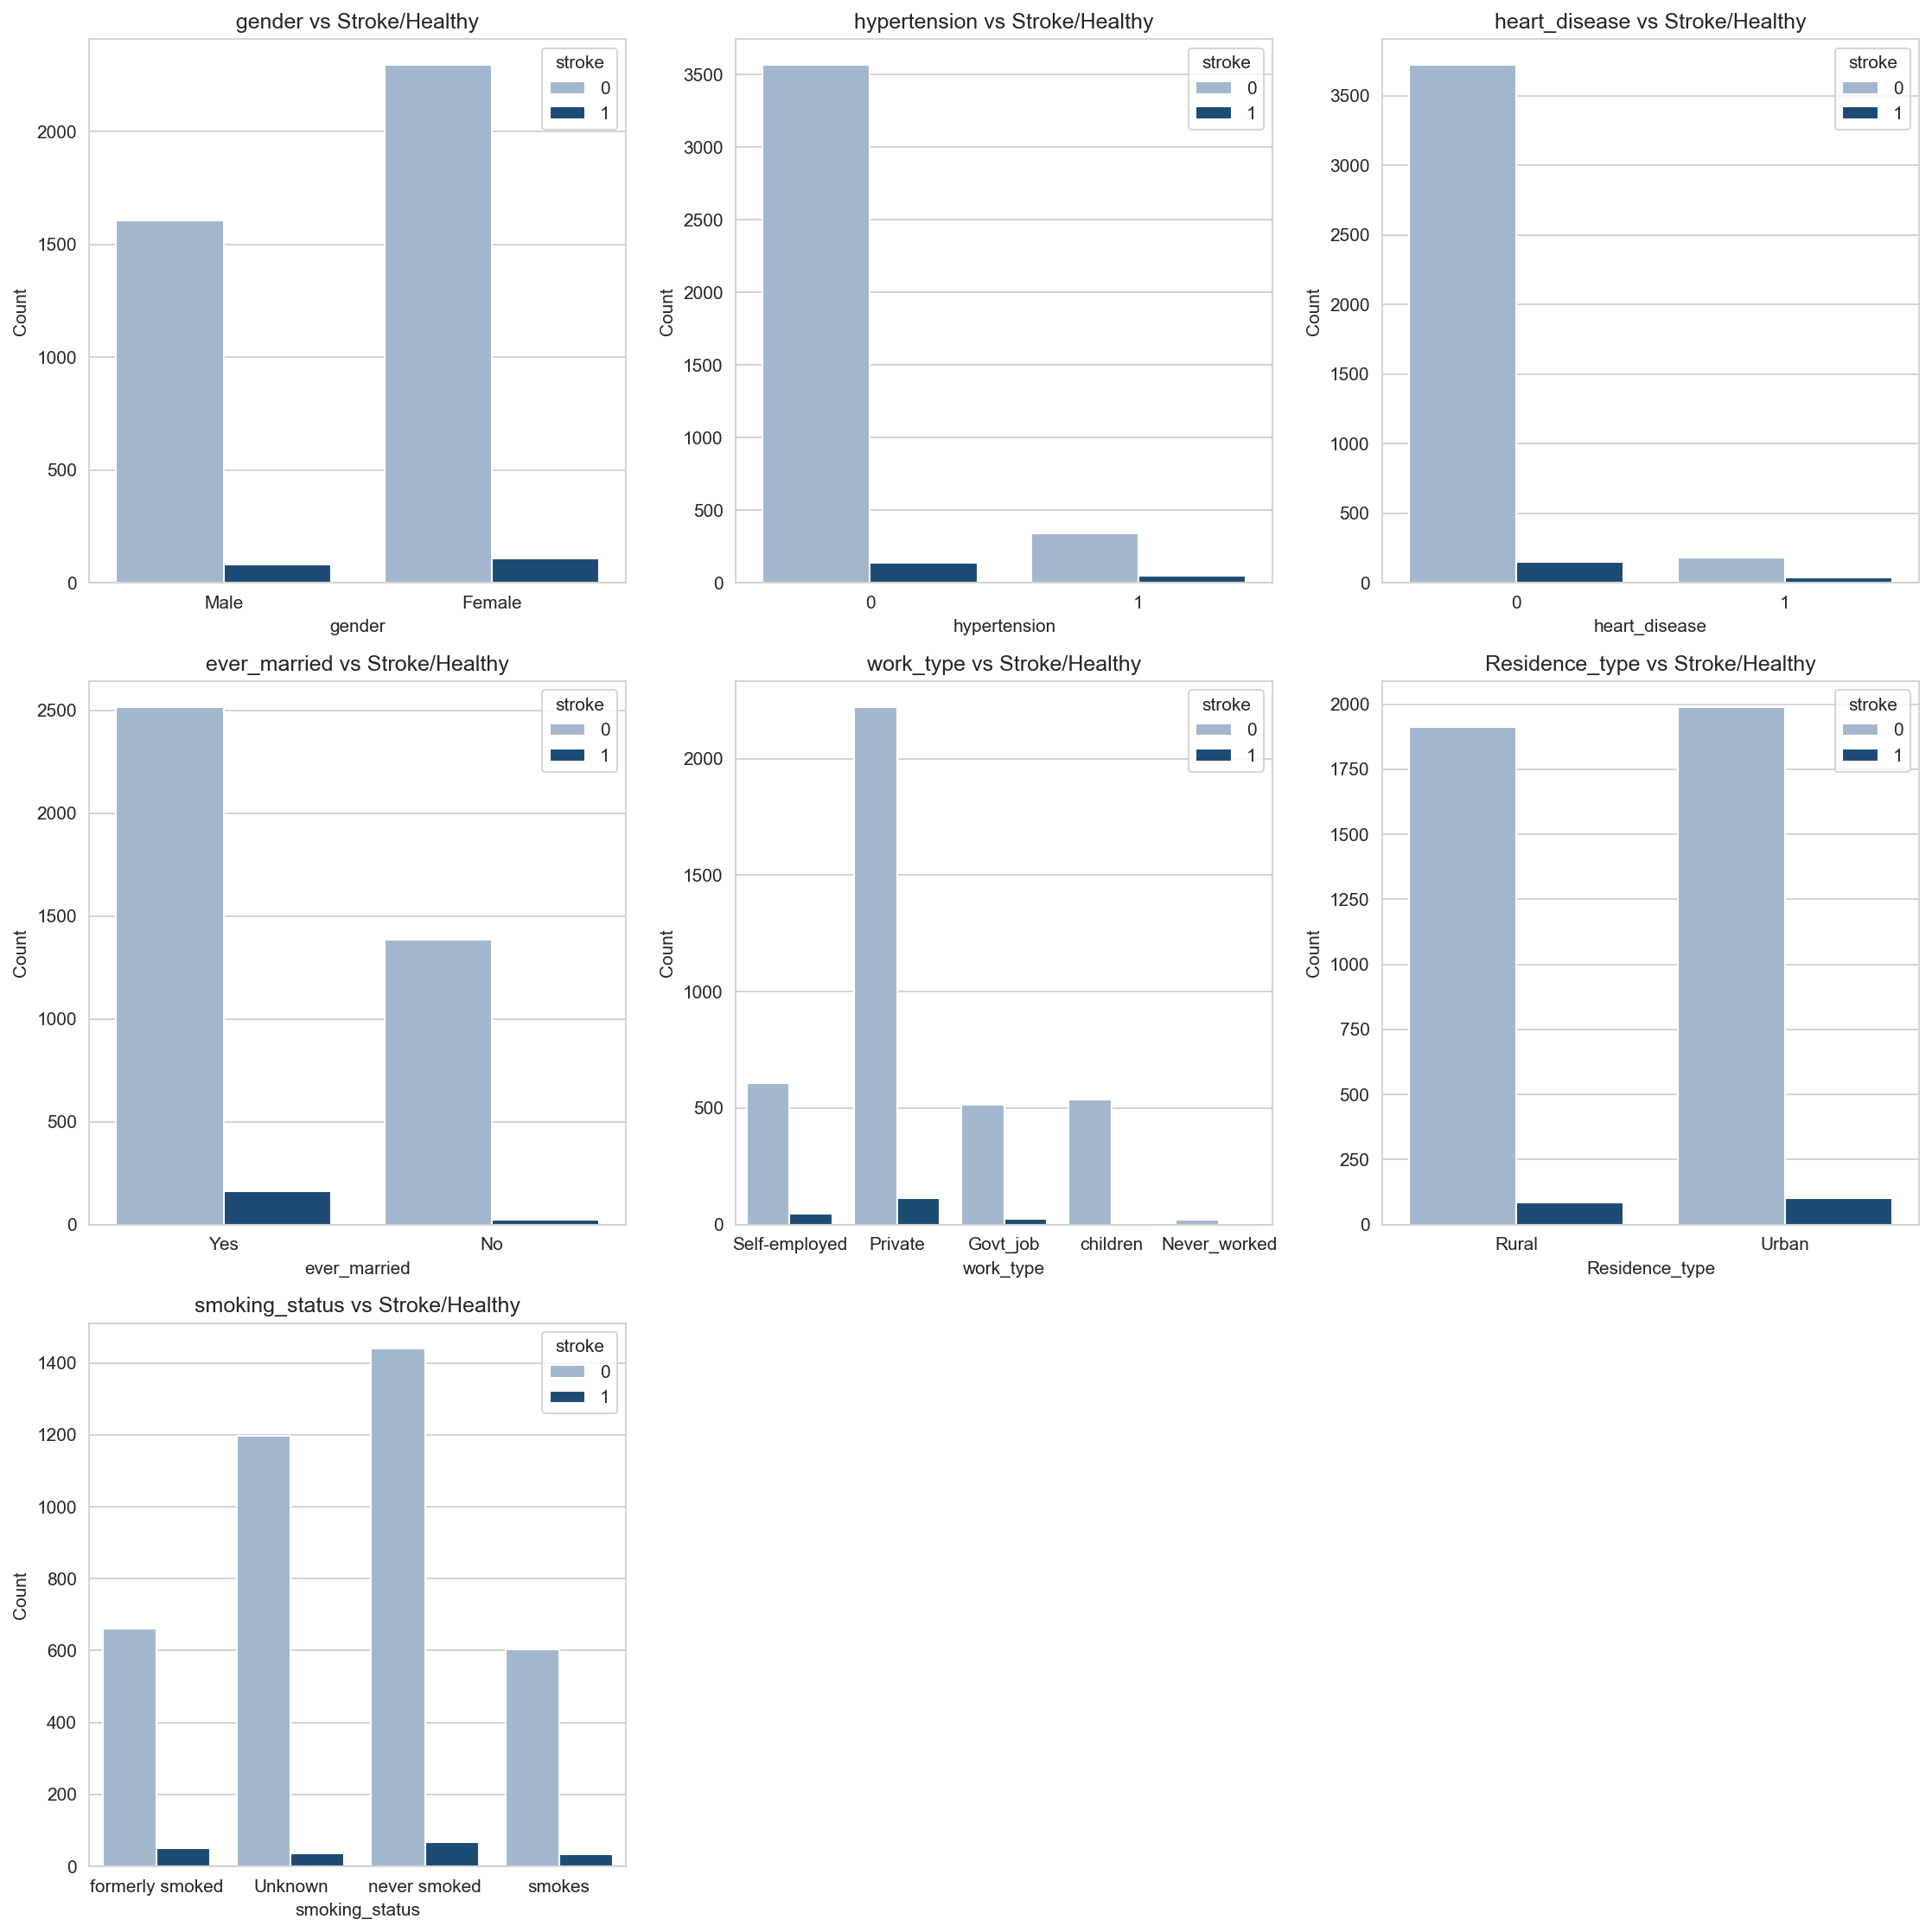

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical predictors
cat_predictors = [variable for variable in train_df.columns if variable not in ['id','stroke','age','avg_glucose_level','bmi']]

# Calculate the number of rows and columns needed based on the number of predictors
num_rows = len(cat_predictors) // 3 + (len(cat_predictors) % 3 > 0)  # Round up to the nearest integer
num_cols = min(len(cat_predictors), 3)

# Set up the figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows), dpi=150)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical predictor
for i, predictor in enumerate(cat_predictors):
    # Create countplot
    sns.countplot(x=predictor, hue='stroke', data=train_df, ax=axes[i], palette={0: '#9bb7d4', 1: '#0f4c81'})
    
    # Set labels and title
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{predictor} vs Stroke/Healthy')

# Hide unused subplots
for j in range(len(cat_predictors), num_rows * num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [18]:
from scipy.stats import chi2_contingency

# Categorical predictors
cat_predictors = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Dictionary to store p-values
chi2_p_values = {}

# Loop through each categorical predictor
for predictor in cat_predictors:
    # Create a contingency table
    contingency_table = pd.crosstab(train_df[predictor], train_df['stroke'])
    
    # Perform Chi-square test
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Store p-value in the dictionary
    chi2_p_values[predictor] = p_value

# Print p-values
for predictor, p_value in chi2_p_values.items():
    print(f'Chi-square test p-value for {predictor}: {p_value}')


Chi-square test p-value for gender: 0.7230663463621134
Chi-square test p-value for hypertension: 1.1314308754364049e-13
Chi-square test p-value for heart_disease: 1.7460827133651004e-16
Chi-square test p-value for ever_married: 7.851243552462494e-10
Chi-square test p-value for work_type: 6.527155273536079e-07
Chi-square test p-value for Residence_type: 0.380978610308659
Chi-square test p-value for smoking_status: 0.00042497854923760923


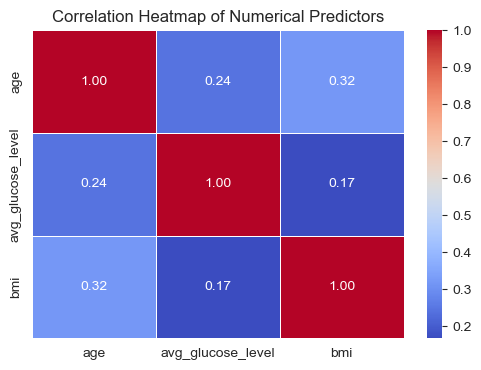

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical predictors
num_predictors = ['age', 'avg_glucose_level', 'bmi']

# Calculate the correlation matrix
corr_matrix = train_df[num_predictors].corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Predictors')
plt.show()


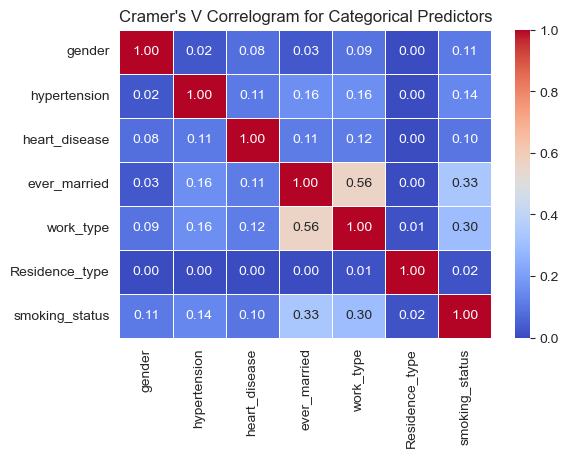

In [29]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


# Categorical predictors
cat_predictors = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Compute Cramer's V values
cramer_v_matrix = pd.DataFrame(index=cat_predictors, columns=cat_predictors)

for i, predictor1 in enumerate(cat_predictors):
    for j, predictor2 in enumerate(cat_predictors):
        confusion_matrix = pd.crosstab(train_df[predictor1], train_df[predictor2])
        cramer_v_matrix.iloc[i, j] = cramers_v(confusion_matrix)

cramer_v_matrix = cramer_v_matrix.apply(pd.to_numeric)

# Plot the correlogram
plt.figure(figsize=(6, 4))
sns.heatmap(cramer_v_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Cramer's V Correlogram for Categorical Predictors")
plt.show()


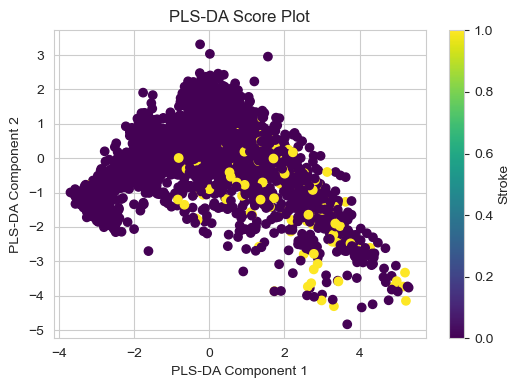

In [21]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train)

# Fit a PLS-DA model
plsda = PLSRegression(n_components=2)
plsda.fit(X_train_encoded, y_train)

# Transform the predictors using the fitted model
X_plsda = plsda.transform(X_train_encoded)

# Plot the PLS-DA score plot
plt.figure(figsize=(6, 4))
plt.scatter(X_plsda[:, 0], X_plsda[:, 1], c=y_train, cmap='viridis')
plt.title('PLS-DA Score Plot')
plt.xlabel('PLS-DA Component 1')
plt.ylabel('PLS-DA Component 2')
plt.colorbar(label='Stroke')
plt.grid(True)
plt.show()

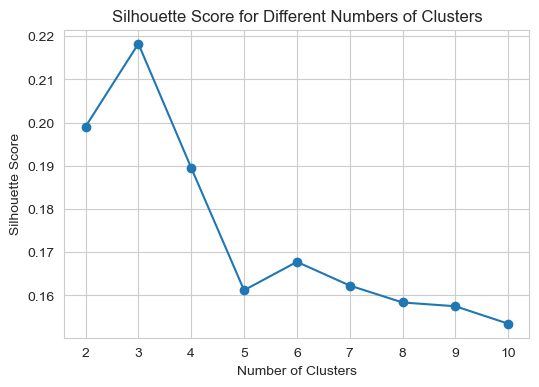

Optimal number of clusters: 3


In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

numerical_columns = ['age', 'avg_glucose_level', 'bmi']
categorical_columns =  ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # numerical_columns should contain the names of numerical columns
        ('cat', OneHotEncoder(), categorical_columns)  # categorical_columns should contain the names of categorical columns
    ])

# Fit and transform the preprocessor
X_train_processed = preprocessor.fit_transform(X_train)

# List to store silhouette scores
silhouette_scores = []

# Define range of clusters to try
min_clusters = 2
max_clusters = 10

# Calculate silhouette score for each number of clusters
for n_clusters in range(min_clusters, max_clusters + 1):
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_train_processed)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_train_processed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(6, 4))
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True)
plt.show()

# Find the optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + min_clusters
print("Optimal number of clusters:", optimal_clusters)


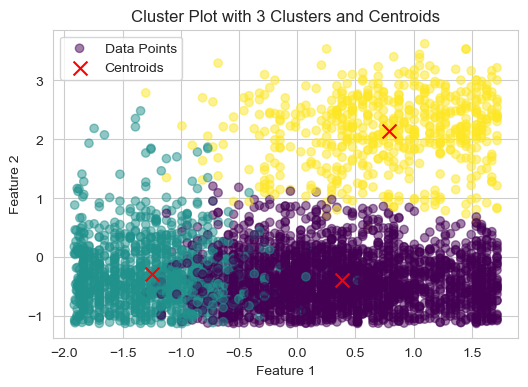

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

numerical_columns = ['age', 'avg_glucose_level', 'bmi']
categorical_columns =  ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # numerical_columns should contain the names of numerical columns
        ('cat', OneHotEncoder(), categorical_columns)  # categorical_columns should contain the names of categorical columns
    ])

# Fit and transform the preprocessor
X_train_processed = preprocessor.fit_transform(X_train)

# Fit KMeans clustering model with optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init = 10)
kmeans.fit(X_train_processed)

# Plot the clusters and centroids
plt.figure(figsize=(6,4))

# Plot data points
plt.scatter(X_train_processed[:, 0], X_train_processed[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5, label='Data Points')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')

plt.title('Cluster Plot with 3 Clusters and Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
